# Importación de librerías

In [1]:
import pandas as pd
import re
import nltk

from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import vstack

# Carga de datos

In [2]:
df_train1 = pd.read_csv('./data/tipo1_entrenamiento_estudiantes.csv')

In [3]:
df_train2 = pd.read_csv('./data/tipo2_entrenamiento_estudiantes.csv')

# Entendimiento de los datos

## Perfilamiento de los datos

In [4]:
df_train1.shape

(7875, 2)

In [5]:
df_train1.head()

,Review,Class
0,Nos alojamos en una casa alquilada en la ciuda...,4
1,"La comida está bien, pero nada especial. Yo te...",3
2,"En mi opinión, no es una como muchos usuarios ...",3
3,esta curiosa forma que asemeja una silla de mo...,4
4,Lo mejor era la limonada. Me gusto la comida d...,2


In [6]:
df_train2.shape

(7875, 2)

In [7]:
df_train2.head()

,Review,Class
0,Muy buena atención y aclaración de dudas por p...,5
1,Buen hotel si están obligados a estar cerca de...,3
2,"Es un lugar muy lindo para fotografías, visite...",5
3,Abusados con la factura de alimentos siempre s...,3
4,Tuvimos un par de personas en el grupo que rea...,3


In [8]:
df_train1.info(), df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


(None, None)

In [9]:
df_train1.describe(), df_train2.describe()

(             Class
 count  7875.000000
 mean      3.491683
 std       1.328275
 min       1.000000
 25%       2.000000
 50%       4.000000
 75%       5.000000
 max       5.000000,
              Class
 count  7875.000000
 mean      3.502603
 std       1.320435
 min       1.000000
 25%       3.000000
 50%       4.000000
 75%       5.000000
 max       5.000000)

## Calidad de los datos

In [10]:
df_model_1=df_train1.copy()
df_model_2=df_train2.copy()

### Completitud

In [11]:
# Cálculo de porcentaje de valores nulos por columna
((df_model_1.isnull().sum()/df_model_1.shape[0])).sort_values(ascending=False)

Review    0.0
Class     0.0
dtype: float64

In [12]:
# Cálculo de porcentaje de valores nulos por columna
((df_model_2.isnull().sum()/df_model_2.shape[0])).sort_values(ascending=False)

Review    0.0
Class     0.0
dtype: float64

### Unicidad

In [13]:
df_model_1.duplicated(keep = False).sum()

109

In [14]:
df_model_2.duplicated(keep = False).sum()

102

In [15]:
df_model_1.drop_duplicates(keep = 'first', inplace = True)
df_model_2.drop_duplicates(keep = 'first', inplace = True)

In [16]:
df_model_1.duplicated(keep = False).sum()

0

In [17]:
df_model_2.duplicated(keep = False).sum()

0

### Consistencia

In [18]:
#Se revisa consistencia de las columnas categoricas
df_model_1['Review'].value_counts()

Review
Nos alojamos en una casa alquilada en la ciudad amurallada. Parecía tan segura como cualquier otra gran ciudad con un montón de buenos restaurantes, tiendas y vida nocturna. Gran lugar para un grupo con intereses variados, no estoy seguro de que le traiga a los niños aquí sólo porque no hay mucho que hacer para ellos. Asegúrate de aventurarse fuera de la ciudad, pero algunos también es un gran lugar para alojarse                                                                                                                                                                                                                                                                                                                                                                                    1
considerando las eventualidades en que nos tocó la estadía (huracán Irma) , el Personal y todos en el hotel muy profesionales , siempre amables y dedicados. excelencia en la atención en todo momento , lo

In [19]:
df_model_2['Review'].value_counts()

Review
Muy buena atención y aclaración de dudas por parte de la señorita Verónica castillo, atenta y amable en cuestión laborable.  Ideal para descansar muy buenas habitaciónes, limpieza, ordenadas.  Buena comida de parte del restaurante,variedad en comidas                                                                                                                                                                                                                                                                                                                                                                                                                                                          1
El sitio es realmente precioso y estimulante. Conseguir un guía y paseo a través del sitio web. llegar allí super pronto porque hace mucho calor y estaba llena de gente. Hay restaurantes en la ciudad y un cenote cerca que escuché vale la pena una visita.                                             

### Validez

In [20]:
df_model_1['Review'].unique()

array(['Nos alojamos en una casa alquilada en la ciudad amurallada. Parecía tan segura como cualquier otra gran ciudad con un montón de buenos restaurantes, tiendas y vida nocturna. Gran lugar para un grupo con intereses variados, no estoy seguro de que le traiga a los niños aquí sólo porque no hay mucho que hacer para ellos. Asegúrate de aventurarse fuera de la ciudad, pero algunos también es un gran lugar para alojarse',
       'La comida está bien, pero nada especial. Yo tenía mejor comida Mexcan en los Estados Unidos. Las margaritas eran geniales. El Mahi Mahi pescado recocido y seco. La carne fajitas aceptable y el coco camarones sabroso. El tortilla chips aperitivo fue decepcionante.',
       'En mi opinión, no es una como muchos usuarios reclaman. Es un gran paladar que parece ser una parada con muchos grupos de excursión. El menú es más interesante que los otros restaurantes comimos en. La parte más interesante de la experiencia es que el...edificio está en una sección de La Ha

In [21]:
df_model_2['Review'].unique()

array(['Muy buena atención y aclaración de dudas por parte de la señorita Verónica castillo, atenta y amable en cuestión laborable.  Ideal para descansar muy buenas habitaciónes, limpieza, ordenadas.  Buena comida de parte del restaurante,variedad en comidas  ',
       'Buen hotel si están obligados a estar cerca del centro de convenciones, pero el restaurante necesita mejorar! Frío y café flojo - y - un montón de pan de personas que sirve unos uderstanding de bu lo que significa un servicio. En este barrio con tan pocas opciones - debería ser un hotel especial.',
       'Es un lugar muy lindo para fotografías, visiten Selina, música en vivo, cerveza artesanal y buena comida',
       ...,
       'La Plaza de la Revolución es un lugar emblemático que un poco que identifica a la Habana a partir de la segunda mitad del siglo XX, ya que es alli donde se han producido la mayoría los principales discursos de los lideres de la Revolución Cubana. Ademas esta rodeada de varios edificios majestu

# Modelamiento

## Modelo de Regresión logística - Santiago Ramírez

### Preparamiento de los datos

In [22]:
# Descargar las stopwords en español
nltk.download('stopwords')

# Crear el stemmer en español
stemmer = SnowballStemmer('spanish')

# Crear la lista de stopwords en español
stopwords_es = set(stopwords.words('spanish'))

def preprocess_review(review):
    # Convertir a minúsculas
    review = review.lower()

    # Eliminar caracteres especiales
    review = re.sub(r'\W', ' ', review)

    # Eliminar palabras vacías y realizar stemming
    review = [stemmer.stem(word) for word in review.split() if word not in stopwords_es]

    return ' '.join(review)

# Preprocesar todas las reseñas
preprocessed_reviews_1 = [preprocess_review(review) for review in df_model_1['Review']]
preprocessed_reviews_2 = [preprocess_review(review) for review in df_model_2['Review']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Construcción del modelo

In [23]:
# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Aplicar el vectorizador a las reseñas preprocesadas
tfidf_reviews_1 = vectorizer.fit_transform(preprocessed_reviews_1)
tfidf_reviews_2 = vectorizer.transform(preprocessed_reviews_2)

In [24]:
# Los puntajes de las reseñas para cada grupo de datos
labels_1 = df_model_1['Class'].tolist()
labels_2 = df_model_2['Class'].tolist()

# Concatenar las matrices TF-IDF y las etiquetas
tfidf_reviews = vstack([tfidf_reviews_1, tfidf_reviews_2])
labels = labels_1 + labels_2

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(tfidf_reviews, labels, test_size=0.2, random_state=0)

In [25]:
# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Validación del modelo

In [26]:
# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Calcular la sensibilidad del modelo
recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')

# Un informe detallado de clasificación
print(classification_report(y_test, y_pred))

Accuracy: 0.4951953875720692
Recall: 0.45927696913933397
              precision    recall  f1-score   support

           1       0.58      0.38      0.46       322
           2       0.40      0.39      0.40       452
           3       0.41      0.38      0.40       617
           4       0.44      0.43      0.43       788
           5       0.60      0.71      0.65       943

    accuracy                           0.50      3122
   macro avg       0.49      0.46      0.47      3122
weighted avg       0.49      0.50      0.49      3122



### Entendimiento del modelo

In [27]:
# Obtener los nombres de las características (palabras)
feature_names = vectorizer.get_feature_names_out()

# Obtener los coeficientes del modelo
coefficients = model.coef_

# Para cada clase, encontrar las 10 palabras con los coeficientes más grandes
for i, class_label in enumerate(model.classes_):
    top10_indices = coefficients[i].argsort()[-10:]
    top10_words = [feature_names[index] for index in top10_indices]
    print(f'Class {class_label}: {top10_words}')

Class 1: ['pag', 'ningun', 'terribl', 'cucarach', 'rob', 'horribl', 'suci', 'mal', 'peor', 'pesim']
Class 2: ['car', 'sabor', 'des', 'desgraci', 'siqu', 'suci', 'pobr', 'parec', 'decepcion', 'mal']
Class 3: ['buen', 'bien', 'men', 'bastant', 'falt', 'pareci', 'demasi', 'regul', 'embarg', 'normal']
Class 4: ['histori', 'limpi', 'agrad', 'unic', 'disfrut', 'estupend', 'bien', 'excelent', 'comod', 'buen']
Class 5: ['gran', 'sup', 'hermos', 'perfect', 'maravill', 'recomend', 'encant', 'increibl', 'delici', 'excelent']


## Modelo de Random Forest- Mario Alejandro Ruiz


## Preparamiento de los datos
El proceso de stopwords, stemming y limpieza de datos es identico al del modelo anterior por lo que se usaran los datos previamente procesados.


## Construcción del modelo

In [28]:
# Importar las librerias necesarias
from sklearn.ensemble import RandomForestClassifier
import numpy as np
# Crearm el Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Validacion del modelo


In [29]:
# Predecir las etiquetas
y_pred = model.predict(X_test)

# Calcular el accuracy de modelo
accuracy = accuracy_score(y_test, y_pred)

# Calcular el recall del modelo
recall = recall_score(y_test, y_pred, average="macro")

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")

# Reporte
print(classification_report(y_test, y_pred))

Accuracy: 0.45803971812940425
Recall: 0.40761531413408447
              precision    recall  f1-score   support

           1       0.55      0.25      0.35       322
           2       0.40      0.37      0.39       452
           3       0.39      0.29      0.33       617
           4       0.40      0.36      0.38       788
           5       0.52      0.76      0.62       943

    accuracy                           0.46      3122
   macro avg       0.45      0.41      0.41      3122
weighted avg       0.45      0.46      0.44      3122



## Entendimiento del modelo


In [30]:
# Importances de los features
importances = model.feature_importances_

# Indices sorteados por importancia
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(10):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature mal (0.010801210067890683)
2. feature excelent (0.010552403298136243)
3. feature buen (0.008426643092562643)
4. feature com (0.005987460641987274)
5. feature habit (0.00563642694640854)
6. feature servici (0.00547302310953717)
7. feature hotel (0.005406683890929452)
8. feature lug (0.0053825597703205195)
9. feature bien (0.0046811648599627284)
10. feature si (0.004559028918364147)


##Modelo SVC- Santiago Gélvez

###Construcción del modelo

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

###Validación del modelo

In [39]:
# Predecir las etiquetas
y_pred = model.predict(X_test)

# Calcular el accuracy de modelo
accuracy = accuracy_score(y_test, y_pred)

# Calcular el recall del modelo
recall = recall_score(y_test, y_pred, average="macro")

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")

# Reporte
print(classification_report(y_test, y_pred))

Accuracy: 0.5064061499039078
Recall: 0.47600420833370516
              precision    recall  f1-score   support

           1       0.58      0.40      0.48       322
           2       0.41      0.42      0.41       452
           3       0.43      0.42      0.42       617
           4       0.44      0.45      0.45       788
           5       0.63      0.69      0.66       943

    accuracy                           0.51      3122
   macro avg       0.50      0.48      0.48      3122
weighted avg       0.51      0.51      0.50      3122



###Entendimiento del modelo

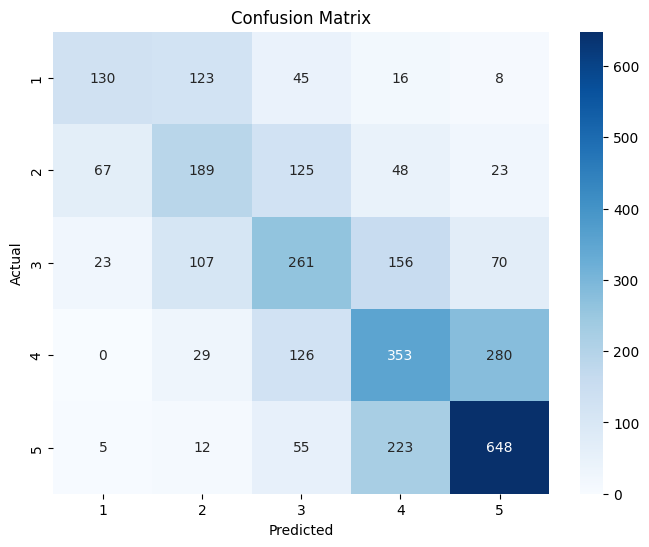

In [43]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()